In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Read data from file using Pandas facilities

data from https://tassidicambio.bancaditalia.it/

In [9]:
ex2017=pd.read_csv('2017.csv')

###### List the names of columns to get an idea of which columns are the interesting ones

In [10]:
ex2017.columns

Index(['Currency', 'ISO Code', 'UIC Code', 'Rate', 'Rate convention',
       'Reference date (CET)'],
      dtype='object')

In [11]:
ex2017.info

<bound method DataFrame.info of         Currency ISO Code  UIC Code    Rate  \
0    Swiss Franc      CHF         3  1.1718   
1    Swiss Franc      CHF         3  1.1736   
2    Swiss Franc      CHF         3  1.1763   
3    Swiss Franc      CHF         3  1.1757   
4    Swiss Franc      CHF         3  1.1709   
5    Swiss Franc      CHF         3  1.1727   
6    Swiss Franc      CHF         3  1.1725   
7    Swiss Franc      CHF         3  1.1736   
8    Swiss Franc      CHF         3  1.1787   
9    Swiss Franc      CHF         3  1.1799   
10   Swiss Franc      CHF         3  1.1795   
11   Swiss Franc      CHF         3  1.1774   
12   Swiss Franc      CHF         3  1.1748   
13   Swiss Franc      CHF         3  1.1758   
14   Swiss Franc      CHF         3  1.1764   
15   Swiss Franc      CHF         3  1.1779   
16   Swiss Franc      CHF         3  1.1735   
17   Swiss Franc      CHF         3  1.1680   
18   Swiss Franc      CHF         3  1.1632   
19   Swiss Franc      CHF   

We deal mostly with numbers, so we convert to numpy array to handle the data.

In [12]:
ex2017reduced_np=np.array(ex2017[ ['Rate',"Reference date (CET)"] ])

###### visualize the shape of the data from numpy and pandas

In [13]:
ex2017.shape[0]

255

In [14]:
ex2017reduced_np.shape

(255, 2)

In [15]:
ex2017.shape

(255, 6)

##### Transoform the data to compute "Rolling averages"

Pandas already offers similar functionality, but our goal was to play with lists!

In [25]:
ex2017[ ['Rate'] ].rolling(window=1).mean()

Rate
0    1.1718
1    1.1736
2    1.1763
3    1.1757
4    1.1709
5    1.1727
6    1.1725
7    1.1736
8    1.1787
9    1.1799
10   1.1795
11   1.1774
12   1.1748
13   1.1758
14   1.1764
15   1.1779
16   1.1735
17   1.1680
18   1.1632
19   1.1563
20   1.1589
21   1.1631
22   1.1603
23   1.1596
24   1.1599
25   1.1571
26   1.1610
27   1.1555
28   1.1500
29   1.1503
..      ...
225  1.1431
226  1.1391
227  1.1328
228  1.1341
229  1.1351
230  1.1316
231  1.1332
232  1.1309
233  1.1273
234  1.1324
235  1.1340
236  1.1323
237  1.1348
238  1.1328
239  1.1304
240  1.1299
241  1.1295
242  1.1248
243  1.1286
244  1.1287
245  1.1254
246  1.1254
247  1.1281
248  1.1328
249  1.1331
250  1.1312
251  1.1312
252  1.1279
253  1.1227
254  1.1269

[255 rows x 1 columns]

###### test a few expressions that are useful to make subset of datas and initialize some arrays

In [16]:
ex2017reduced_np[0:1]

array([[1.1718, '2018-01-02']], dtype=object)

In [17]:
np.zeros(0)

array([], dtype=float64)

##### My function

In [18]:
DEBUG=False
averages=np.array([[]])
for window_size in range(ex2017reduced_np.shape[0]):
    #windows can have size bbetween 1 and the total length of the array
    if DEBUG: print('window size=',window_size)
    first=0
    last=window_size+1
    res=np.zeros(window_size)
    while last <= ex2017reduced_np.shape[0]:
        #res=np.zeros(first)
        new=np.mean(ex2017reduced_np[first:last,0])
        res = np.concatenate((res, [new]), axis=0)
        if DEBUG: print(res)
        first+=1
        last+=1
    if DEBUG: print('computed averages=',len(res))
    if DEBUG: print('computed non vanishing averages=',last-first)
    #averages=np.insert(averages,0,res,axis=0)
    res=np.array([res])
    if DEBUG: print(res.shape)
    if DEBUG: print(averages.shape)
    if np.size(averages)==0:
        averages=res
        if DEBUG: print('moving averages: ',averages)
    else:
        averages=np.append(averages,res,axis=0)
        if DEBUG: print('moving averages: ',averages)


###### check the results

In [26]:
np.shape(averages)

(255, 255)

##### Plot the data with MatplotLib

In [20]:
np.min(averages[averages>0])

1.1217

In [21]:
np.max(averages[averages>0])

1.1986

In [22]:
levels = np.sort(np.concatenate((np.arange(1.08, 1.18, 0.02),[1.1537])) )


In [23]:
levels

array([1.08  , 1.1   , 1.12  , 1.14  , 1.1537, 1.16  ])

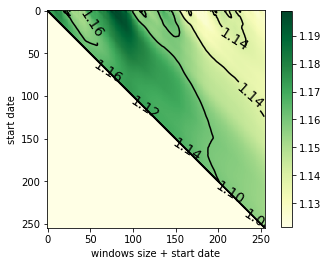

In [27]:
#plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
im=ax.imshow(averages,cmap="YlGn",vmin=np.min(averages[averages>0]),vmax=np.max(averages[averages>0]))
levels=np.arange(1.08, 1.18, 0.02)
CS=ax.contour(averages, levels, colors='k')#cmap='bwr')
ax.clabel(CS, levels, inline=1, fmt='%1.2f', fontsize=14)
plt.xlabel('windows size + start date')
plt.ylabel('start date')
fig.colorbar(im, orientation='vertical', shrink=0.99)